Name : Keval Shah

SAP : 60009220061

ML Lab : 8

In [1]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris, make_classification

In [2]:
x,y = make_classification(n_samples=5000,n_features=10,
                          n_classes=3,n_clusters_per_class=1)

In [3]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [4]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [5]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.8934117647058823


In [6]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CV average score: 0.89


In [7]:
ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[235  11   4]
 [ 51 188   9]
 [  4   0 248]]


In [8]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       250
           1       0.94      0.76      0.84       248
           2       0.95      0.98      0.97       252

    accuracy                           0.89       750
   macro avg       0.90      0.89      0.89       750
weighted avg       0.90      0.89      0.89       750



In [9]:
print("Iris dataset classification with SVC")

iris = load_iris()
x, y = iris.data, iris.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

Iris dataset classification with SVC


In [10]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC()


In [11]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.968503937007874


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

CV average score: 0.95


In [13]:
ypred = lsvc.predict(xtest)

In [14]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[ 6  0  0]
 [ 0  7  0]
 [ 0  0 10]]


In [15]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()

In [16]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [17]:
from __future__ import division,print_function
import matplotlib.pyplot as plt
from sklearn import datasets,svm

In [18]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

In [21]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

84.21052631578948 % accuracy obtained with kernel = linear
76.3157894736842 % accuracy obtained with kernel = poly
84.21052631578948 % accuracy obtained with kernel = rbf


In [22]:
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

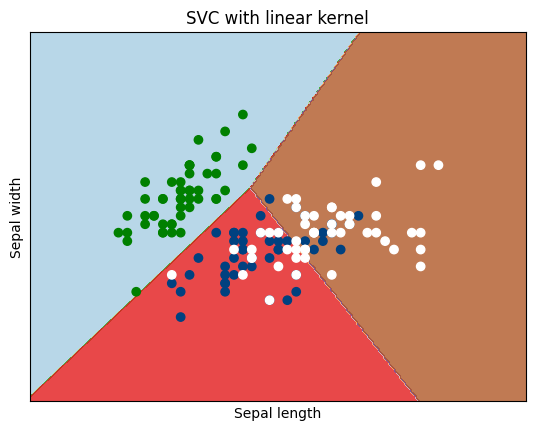

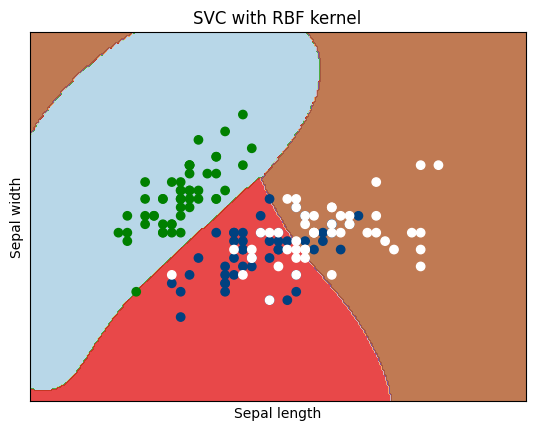

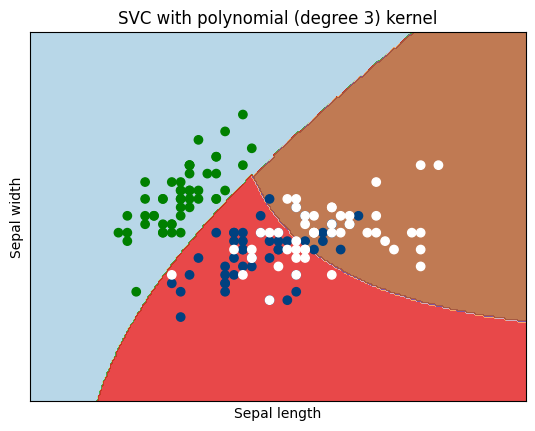

In [23]:
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.figure(i)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [24]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning

In [25]:
X,y = fetch_openml("mnist_784",version=1,return_X_y=True,as_frame=False)
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy: 0.8348666666666666


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

y_pred_train = lin_clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy: 0.9214


In [28]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

y_pred_train = svm_clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

y_pred_test = svm_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9455333333333333
Test Accuracy: 0.9389


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

print(X_train_scaled.shape)
print(y_train.shape)

X_train_scaled_subset = X_train_scaled[:112]
y_train_subset = y_train[:112]

rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled_subset, y_train_subset)


(60000, 784)
(60000,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=6.963187740539605, gamma=0.002349047830068742; total time=   0.0s
[CV] END ....C=6.963187740539605, gamma=0.002349047830068742; total time=   0.0s
[CV] END ....C=6.963187740539605, gamma=0.002349047830068742; total time=   0.0s
[CV] END ....C=2.663080448416122, gamma=0.001553396371540171; total time=   0.0s
[CV] END ....C=2.663080448416122, gamma=0.001553396371540171; total time=   0.0s
[CV] END ....C=2.663080448416122, gamma=0.001553396371540171; total time=   0.0s
[CV] END ...C=8.060257203198415, gamma=0.0010778726666161812; total time=   0.0s
[CV] END ...C=8.060257203198415, gamma=0.0010778726666161812; total time=   0.0s
[CV] END ...C=8.060257203198415, gamma=0.0010778726666161812; total time=   0.0s
[CV] END ...C=2.978416419527705, gamma=0.0011769207911320394; total time=   0.0s
[CV] END ...C=2.978416419527705, gamma=0.0011769207911320394; total time=   0.0s
[CV] END ...C=2.9784164195

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cab8f032b00>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cab8f033be0>},
                   verbose=2)

In [30]:
rnd_search_cv.best_estimator_

SVC(C=8.060257203198415, gamma=0.0010778726666161812)